# JupyterLabの概要

JupyterLabは、Pythonをはじめとする多くのプログラミング言語で、対話的なデータ解析や可視化を行うための環境です。どちらもブラウザ上で動作し、コード、テキスト、数式、グラフなどを一つのドキュメントにまとめることができます。

Jupyter Notebookは、セル（cell）と呼ばれる単位で構成されており、コードセルにPythonコードを書いて実行したり、Markdownセルに説明文や数式を書くことができます。JupyterLabはNotebookの後継的なインターフェースで、より柔軟で多機能な作業環境を提供します。

## JupyterLabの基本的な概念

JupyterLabは、Notebook、ターミナル、ファイルブラウザ、テキストエディタなどを統合した開発環境です。Notebookを中心に据えつつも、複数のタブを並べて開いたり、複数のファイルを同時に編集したりすることができます。  
JupyterLabでは以下のような特徴があります。

* **ファイルブラウザ**：左側にあるペインで、プロジェクト内のファイルを管理できます。  
* **ランチャー**：新しいNotebookやターミナルを簡単に起動できます。  
* **拡張機能（Extension）**：テーマの変更やコード補完などを追加できます。  
* **ドラッグ＆ドロップ操作**：Notebookやエディタを自由に並べ替えられます。

## JupyterLabの起動方法

JupyterLabはAnacondaやpipでインストールできます。以下のコマンドで起動します。

```
jupyter lab
```

このコマンドを実行すると、ブラウザが自動的に開き、JupyterLabの画面が表示されます。

## Notebookの基本的な使い方

Notebookはセルを単位として構成されます。コードセルにはPythonなどのコードを記述し、Shift + Enterで実行します。Markdownセルを使用すると、説明文やLaTeX形式の数式を挿入することができます。

以下は、簡単なPythonコードの例です。

In [1]:
for i in range(4):
    print(f"{i=}")

i=0
i=1
i=2
i=3


In [2]:
x = 20
y = 30
x + y

50

Notebookでは、実行結果がコードセルの下に表示されます。

## グラフの描画

JupyterLabでは、Matplotlibなどのライブラリを使用して、簡単にグラフを描くことができます。  
以下は、簡単な折れ線グラフを描く例です。

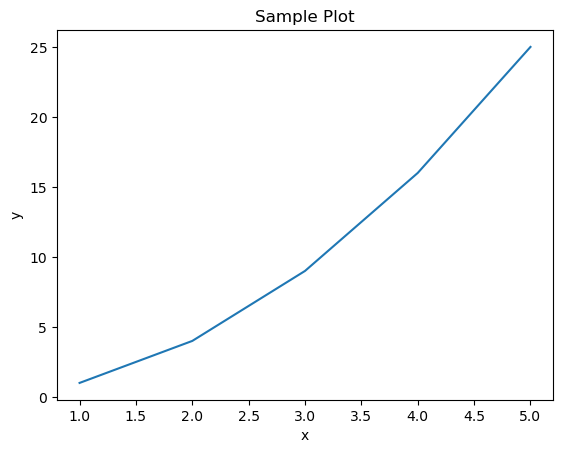

In [9]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

plt.plot(x, y)
plt.title("Sample Plot")
plt.xlabel("x")
plt.ylabel("y");

このコードを実行すると、Notebook上にグラフが描画されます。Matplotlib以外にも、PlotlyやAltairなどのインタラクティブな可視化ライブラリも利用できます。

## Markdownによる説明の追加

Markdownセルを使うと、Notebookに説明や数式をわかりやすく記述できます。  
LaTeX記法を使って、数式を挿入することも可能です。

```markdown
このNotebookでは、次のような関数を考えます。

$$ f(x) = x^2 + 2x + 1 $$
```

$$ f(x) = x^2 + 2x + 1 $$

このようにして、コードと理論説明を同じNotebook内にまとめることができます。

## JupyterLabの構成

```mermaid
%%{init: {'flowchart': {'nodeSpacing': 10, 'rankSpacing': 10}}}%%
%%{init: {'themeVariables': {
    'fontSize': '12px',
    'fontFamily': 'Arial'
}}}%%
flowchart TB
    %% ノード定義
    subgraph Client[クライアント]
        A1[セル編集・コード実行・可視化表示]
        A2[WebSocket/HTTP通信によるリクエスト送信]
    end

    subgraph Server[サーバー]
        B1[Notebookファイルや設定の管理]
        B2[通信制御（WebSocket管理）]
        B3[カーネルの起動・停止・切替]
        B4[拡張機能のロード]
    end

    subgraph Kernel[カーネル]
        C1[Python, R, Julia, C++, Rustなど]
        C2[コード実行と結果計算]
    end

    %% 接続
    A2 -->|1. 実行リクエスト送信| Server
    Server -->|2. コード転送| Kernel
    Kernel -->|3. 実行結果を返す| Server
    Server -->|4. 結果をNotebookに送信| Client
```

JupyterLabは、**クライアント・サーバー・カーネル（kernel）** の三層構造で動作しています。これにより、ブラウザ上での操作と、実際のコード実行を分離し、柔軟かつ安全な環境を実現しています。

### クライアント

クライアントは、ユーザーが直接操作する**ブラウザ上のJupyterLabインターフェース**です。Notebookのセル編集、コードの実行、ファイル操作、可視化の表示などはすべてクライアントで行われます。
クライアントはWebSocketやHTTPを通じてサーバーと通信します。ユーザーの操作（例：セルの実行要求）はサーバーに送られ、サーバーを経由してカーネルに伝えられます。

### サーバー

Jupyterサーバーは、クライアントとカーネルの間を仲介する **中間層（バックエンド）** です。通常、`jupyter lab`コマンドを実行するとこのサーバーがローカルで起動します。

サーバーの主な役割は以下の通りです。

* Notebookファイルや設定ファイルなどの管理
* クライアントとの通信制御（WebSocket通信の管理）
* カーネルの起動・停止・切り替え
* 拡張機能（Extension）のロード

サーバー自体はPythonで書かれていますが、ブラウザ側（クライアント）はJavaScript/TypeScriptで構成されています。そのため、JupyterLabは「Python環境に依存しないフロントエンド」と「Pythonベースのバックエンド」という分離構造を持ちます。

### カーネル（Kernel）

カーネルは、実際にコードを実行する**計算エンジン**です。
NotebookでPythonコードを実行すると、Jupyterサーバーがそのコードをカーネルに送信し、カーネルが結果を計算してサーバーを通じてクライアントに返します。

Pythonだけでなく、R、Julia、C++、Rustなど、さまざまなカーネルを切り替えて使用できます。
Pythonカーネルは「IPython Kernel」と呼ばれ、`ipykernel`パッケージによって提供されています。

コード実行の流れは次のようになります。

1. ユーザーがブラウザ（クライアント）でセルを実行する。
2. クライアントがサーバーへ「このコードを実行してほしい」というリクエストを送る。
3. サーバーがカーネルへコードを転送する。
4. カーネルがコードを実行し、その結果をサーバーへ返す。
5. サーバーが結果をクライアントに送り、Notebook上に表示する。

このように、JupyterLabではクライアント（ブラウザ）・サーバー（通信と管理）・カーネル（実行）の3つが連携して動作しています。

## まとめ

JupyterLabは、Jupyter Notebookの利便性を拡張した強力な統合開発環境です。Notebookを中心とした対話的なワークフローを保ちながら、複数のツールを統合的に扱える点が大きな特徴です。  
Pythonでのデータ分析や可視化を効率的に進めるための標準的な環境として、多くの研究・開発現場で利用されています。